<a href="https://colab.research.google.com/github/escapingLife/mashinePrograming/blob/master/3%EC%A3%BC%EC%B0%A8/weatherNoRainTomorrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score  # 회귀 모델 평가 지표

# -----------------------------


# 1) 데이터 준비

# -----------------------------
df = pd.read_csv("/content/drive/MyDrive/weather.csv").drop(columns=["RainTomorrow"])

df  # 데이터 프레임을 출력하라는 뜻

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,38,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,45,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,63,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,69,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0


In [19]:
# 결측치 확인
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31


In [20]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [21]:
y = df['Rainfall'] # Rainfall 얻음
y.head()

,Rainfall
0,0.0
1,3.6
2,3.6
3,39.8
4,2.8


In [22]:
X = df.drop(columns=["Rainfall", "Date", "Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday"]) # Rainfall, 문자열로된 정보들 버림
X.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,8.0,24.3,3.4,6.3,30.0,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,3.6
1,14.0,26.9,4.4,9.7,39.0,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,3.6
2,13.7,23.4,5.8,3.3,85.0,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,39.8
3,13.3,15.5,7.2,9.1,54.0,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,2.8
4,7.6,16.1,5.6,10.6,50.0,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,0.0


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(262, 16) (262,)
(66, 16) (66,)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()         # 모델 구성
model.fit(X_train, y_train)        # 모델 훈련
ly_preds = model.predict(X_test)   # 예측데이터 생성
print(mean_squared_error(y_test, ly_preds))  #평가

27.605404835391653


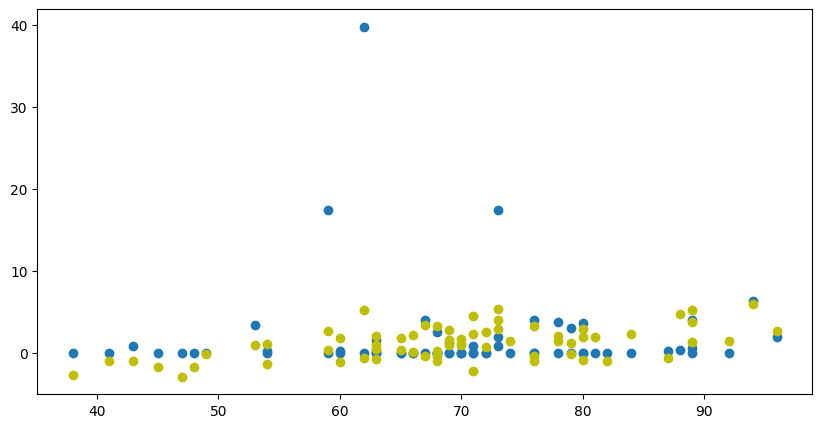

In [26]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(X_test['Humidity9am'], y_test, label='y_test')
plt.scatter(X_test['Humidity9am'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

In [27]:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 31.912020181818157


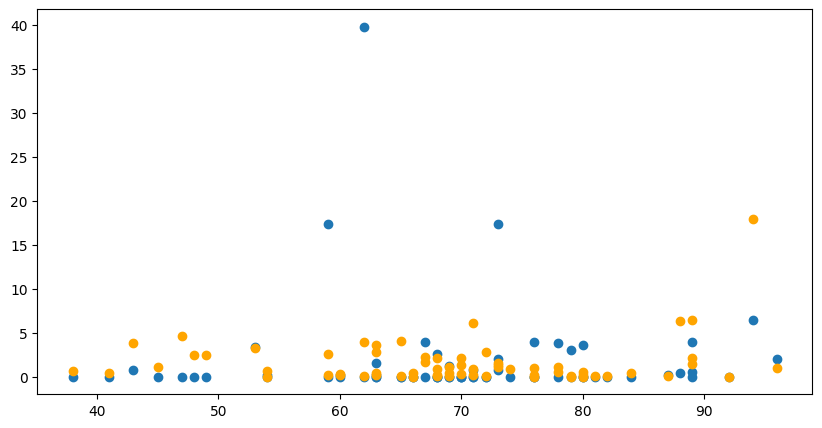

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Humidity9am'], y_test, label='y_test')
plt.scatter(X_test['Humidity9am'], ry_preds, c='orange', label='ry_preds')

plt.show()

In [29]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 42.04121212121212


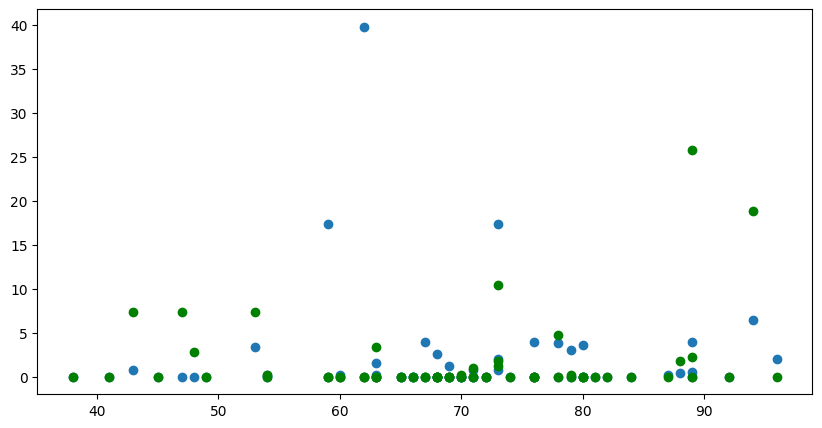

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Humidity9am'], y_test, label='y_test')
plt.scatter(X_test['Humidity9am'], dy_preds, c='g', label='dy_preds')
plt.show()